<a href="https://colab.research.google.com/github/ericmassip/in_the_name_of_deep_learning/blob/master/examples_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial configuration

In [0]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

1.13.1


In [0]:
from google.colab import drive, files
drive.mount('/content/drive/')
path = "drive/My Drive/KU_LEUVEN/CV/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

# Data

1.   Load
2.   Reshape for the convolutional layer
3.   Randomize data
4.   Check train and validation images and labels






In [0]:
image_size = 128
#x_train = pickle.load(open(path + 'dataset/cats_motorbikes_bottles/x_train_gray_128.p', mode='rb'))
#x_train = pickle.load(open(path + 'dataset/cats_motorbikes_bottles/x_train_gray_64.p', mode='rb'))
x_train = pickle.load(open(path + 'dataset/cats_motorbikes_bottles/x_train_rgb_128.p', mode='rb'))
#x_train = pickle.load(open(path + 'dataset/cats_motorbikes_bottles/x_train_rgb_64.p', mode='rb'))
#x_val = pickle.load(open(path + 'dataset/cats_motorbikes_bottles/x_val_gray_128.p', mode='rb'))
#x_val = pickle.load(open(path + 'dataset/cats_motorbikes_bottles/x_val_gray_64.p', mode='rb'))
x_val = pickle.load(open(path + 'dataset/cats_motorbikes_bottles/x_val_rgb_128.p', mode='rb'))
#x_val = pickle.load(open(path + 'dataset/cats_motorbikes_bottles/x_val_rgb_64.p', mode='rb'))
y_train = pickle.load(open(path + 'dataset/cats_motorbikes_bottles/y_train.p', mode='rb'))
y_val = pickle.load(open(path + 'dataset/cats_motorbikes_bottles/y_val.p', mode='rb'))
# remove elements with two classes
#a = y_train[:,0]+y_train[:,1]
#y_train = y_train[a!=2]
#x_train = x_train[a!=2]
#a = y_val[:,0]+y_val[:,1]
#y_val = y_val[a!=2]
#x_val = x_val[a!=2]
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(657, 128, 128, 3)
(644, 128, 128, 3)
(657, 3)
(644, 3)


In [0]:
s = np.arange(x_train.shape[0])
np.random.shuffle(s)
#x_t_r = x_train[s].reshape(-1,image_size,image_size,1)
x_t_r = x_train[s].reshape(-1,image_size,image_size,3)
y_t_r = y_train[s]
s = np.arange(x_val.shape[0])
np.random.shuffle(s)
#x_v_r = x_val[s].reshape(-1,image_size,image_size,1)
x_v_r = x_val[s].reshape(-1,image_size,image_size,3)
y_v_r = y_val[s]
# mix 
x_t_r = np.concatenate((x_t_r, x_v_r[0:400,:,:,:]), axis=0)
y_t_r = np.concatenate((y_t_r, y_v_r[0:400,:]), axis=0)
x_v_r = x_v_r[400:x_v_r.shape[0]]
y_v_r = y_v_r[400:y_v_r.shape[0]]
print(x_t_r.shape)
print(x_v_r.shape)
print(y_t_r.shape)
print(y_v_r.shape)

(1057, 128, 128, 3)
(244, 128, 128, 3)
(1057, 3)
(244, 3)


Train image 1
Label [0 0 1]
Train image 50
Label [0 1 0]


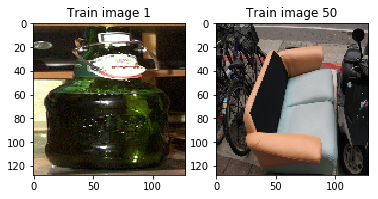

In [0]:
# Train image with label
plt.subplot(121)
img = 1
plt.imshow(x_t_r[img,:,:,:])
#plt.imshow(x_t_r[img,:,:,0],cmap='gray')
plt.title('Train image '+str(img))
print('Train image '+str(img))
print('Label '+str(y_t_r[img]))
plt.subplot(122)
img = 50
plt.imshow(x_t_r[img,:,:,:])
#plt.imshow(x_t_r[img,:,:,0],cmap='gray')
plt.title('Train image '+str(img))
print('Train image '+str(img))
print('Label '+str(y_t_r[img]))

Validation image 0
Label [0 0 1]
Validation image 50
Label [1 0 0]


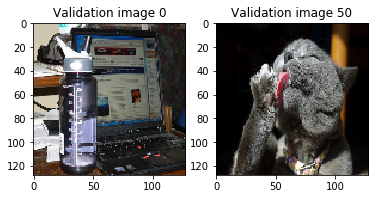

In [0]:
# Validation image with label
plt.subplot(121)
img = 0
plt.imshow(x_v_r[img,:,:,:])
#plt.imshow(x_v_r[img,:,:,0],cmap='gray')
plt.title('Validation image '+str(img))
print('Validation image '+str(img))
print('Label '+str(y_v_r[img]))
plt.subplot(122)
img = 50
plt.imshow(x_v_r[img,:,:,:])
#plt.imshow(x_v_r[img,:,:,0],cmap='gray')
plt.title('Validation image '+str(img))
print('Validation image '+str(img))
print('Label '+str(y_v_r[img]))

# Classifier with a web example of CNN


*   sigmoid
*   binary_crossentropy



In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization, Activation
from keras import regularizers

cnn1 = Sequential()
# - Conv: low number of filters, regularizer to avoid overfitting and a big increase of the weights
# - BatchNormalization: normalization with mean and variance for each batch
# Set of layers 1
cnn1.add(Conv2D(16, (3, 3), padding='same', input_shape=(image_size,image_size,3), kernel_regularizer=regularizers.l2(0.01))) 
cnn1.add(BatchNormalization())
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25)) 

# Set of layers 2
cnn1.add(Conv2D(16, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
cnn1.add(BatchNormalization())
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25)) 

# Set of layers 3
cnn1.add(Conv2D(16, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
cnn1.add(BatchNormalization())
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25)) 

# Set of layers 4
cnn1.add(Conv2D(16, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
cnn1.add(BatchNormalization())
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25)) 

# Set of layers 5
cnn1.add(Conv2D(16, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
cnn1.add(BatchNormalization())
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25)) 

# Set of layers 6
cnn1.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

#cnn1.add(GlobalAveragePooling2D())
cnn1.add(Flatten())
cnn1.add(Dense(3, activation='sigmoid'))

cnn1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
batch_normalization_16 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
activation_16 (Activation)   (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 16)        2320      
_________________________________________________________________
batch_normalization_17 (Batc (None, 64, 64, 16)        64        
__________

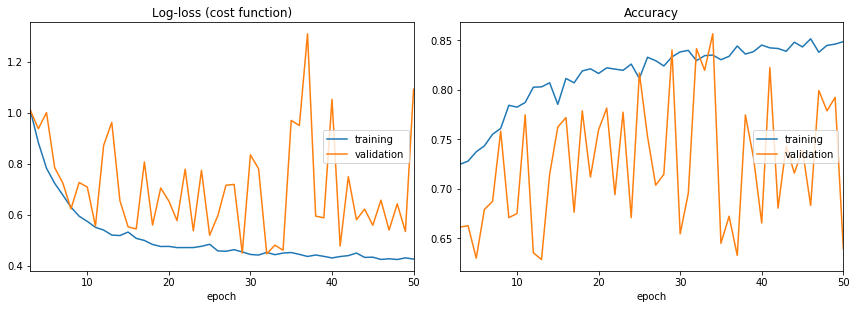

Log-loss (cost function):
training   (min:    0.424, max:    1.419, cur:    0.426)
validation (min:    0.446, max:    1.310, cur:    1.092)

Accuracy:
training   (min:    0.629, max:    0.851, cur:    0.849)
validation (min:    0.628, max:    0.857, cur:    0.639)


In [0]:
cnn1.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])
cnn1.fit(x_t_r,
         y_t_r,
         batch_size=8,
         epochs=50,
         validation_data=(x_v_r,y_v_r),
         callbacks=[PlotLossesKeras(),
                   EarlyStopping(monitor='val_acc', patience=20),
                   ModelCheckpoint(filepath=path+'best_example_classifier.h5', monitor='val_acc', save_best_only=True)])

# Output


In [0]:
prob = cnn1.predict_proba(x_v_r)
thresh = 0.5
true_thresh = prob>=thresh;
false_thresh = prob<thresh;
prob[true_thresh]=1;
prob[false_thresh]=0;
acc = accuracy_score(y_v_r, prob)
print('Accuracy value = '+str(acc))
cnn1.save(path+'example_classifier.h5') 

Accuracy value = 0.4426229508196721


Image 0
Label [0 0 1]
Target [1. 0. 0.]
Image 200
Label [0 0 1]
Target [1. 0. 0.]


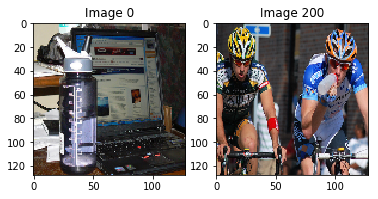

In [0]:
plt.subplot(121)
img = 0
plt.imshow(x_v_r[img,:,:,:])
#plt.imshow(x_v_r[img,:,:,0],cmap='gray')
plt.title('Image '+str(img))
print('Image '+str(img))
print('Label '+str(y_v_r[img]))
print('Target '+str(prob[img]))

plt.subplot(122)
img = 200
plt.imshow(x_v_r[img,:,:,:])
#plt.imshow(x_v_r[img,:,:,0],cmap='gray')
plt.title('Image '+str(img))
print('Image '+str(img))
print('Label '+str(y_v_r[img]))
print('Target '+str(prob[img]))


# Best output


In [0]:
cnn1_best = load_model(path +'best_example_classifier.h5')
prob = cnn1_best.predict_proba(x_v_r)
thresh = 0.5
true_thresh = prob>=thresh;
false_thresh = prob<thresh;
prob[true_thresh]=1;
prob[false_thresh]=0;
acc = accuracy_score(y_v_r, prob)
print('Accuracy value = '+str(acc))

Accuracy value = 0.7336065573770492


Image 0
Label [0 0 1]
Target [0. 0. 1.]
Image 200
Label [0 0 1]
Target [0. 0. 1.]


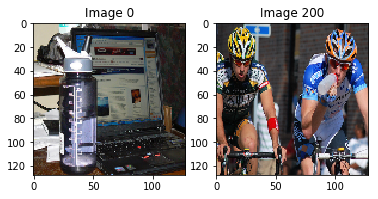

In [0]:
plt.subplot(121)
img = 0
plt.imshow(x_v_r[img,:,:,:])
#plt.imshow(x_v_r[img,:,:,0],cmap='gray')
plt.title('Image '+str(img))
print('Image '+str(img))
print('Label '+str(y_v_r[img]))
print('Target '+str(prob[img]))

plt.subplot(122)
img = 200
plt.imshow(x_v_r[img,:,:,:])
#plt.imshow(x_v_r[img,:,:,0],cmap='gray')
plt.title('Image '+str(img))
print('Image '+str(img))
print('Label '+str(y_v_r[img]))
print('Target '+str(prob[img]))